        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington

<h1 align='center' style="color: blue;">Assignment #2</h1>

<p><b>Question #1</b>: 
<p>Consider the MNIST dataset:</p> 

In [279]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version = 1)
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)

As you know, each X represents a flattened version of a 28 * 28 pixel image in 2 dimensions. You can visualize a sample digit image using the following code.

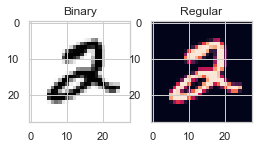

In [280]:
import matplotlib as mpl
import matplotlib.pyplot as plt

a_sample_digit = X[5]
a_sample_digit_image = a_sample_digit.reshape(28,28)

fig, axes = plt.subplots(1,2, figsize=(4,8))
axes[0].imshow(a_sample_digit_image, cmap='binary')
axes[1].imshow(a_sample_digit_image)

axes[0].set_title("Binary")
axes[1].set_title("Regular")

plt.show()

Your job is to convert this image to a three-dimensional image and change its font color to red with a white background. Visualize your imgae.

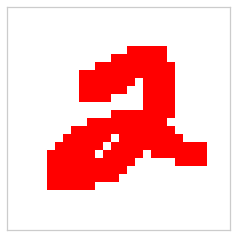

In [281]:
# Write your answer here
from pylab import *

def gray2rgb (inputImage):
    w, h = inputImage.shape
    outputImage = np.empty((w, h, 3), dtype=np.uint8)
    
    for row in range(len(inputImage)):
        for col in range(len(inputImage[0])):
            if inputImage[row][col] > 0:
                outputImage[row, col, 0], outputImage[row, col, 1], outputImage[row, col, 2] = 255, 0, 0
            else:
                outputImage[row, col, 0], outputImage[row, col, 1], outputImage[row, col, 2] = 255, 255, 255
    return outputImage

grayImage = a_sample_digit.reshape(28, 28)
outRGBImage = gray2rgb (grayImage)
fig, ax = plt.subplots(1, figsize=(4,8))
ax.imshow(outRGBImage)
ax.set(xticks=[], yticks=[])
plt.show()

<p><b>Question #2</b>:</p>
<p><b>Important Note:</b> In this Question you need to use Stochastic Gradient Descent classifier. Read more about this classifier at:<p>
<p><b>Link1: </b><a href='https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31'>Click Here</a></p>
<p><b>Link2: </b><a href='https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307'>Click Here</a></p>

You can import this classifer from scikit-learn package using the following code: 

In [282]:
from sklearn.linear_model import SGDClassifier

<b>Note:</b> Use SGDClassifier with its own default hyperparameters.

<ol>
    <li>Consider the MNIST dataset again and follow the steps discussed in the class on the development of predictive models using the scikit-learn package. Develop a <u>Stochastic Gradient Descent</u> classifier that can distinguish digit 7 from the other digits.</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style="color:red">stratify</b> attribute to put same proportion of data in train and test set.</li>  
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
        <li>What is the accuracy of your model for out-of-sample data?</li>
        <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores for in-sample and out-of-sample data.</li>
    <li>Create a second classifier using the Stochastic Gradient Descent Classifier, which can distinguish the digit 7 from the other digits.<b></b> </li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li><b style="color:red">DO NOT USE STRATIFY THIS TIME.</b></li>
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
    <li>What is the accuracy of the second classifier for the out-of-sample data?</li>
    <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores of the second classifer for in-sample and out-of-sample data.</li>
    <li>Create a third classifier using the Stochastic Gradient Descent Classifier, which can distinguish the digit 7 from the other digits.<b></b> </li>
    <ul>
        <li>Use <u><b>85%</b></u> of data for tarining and consider <u><b>15%</b></u> of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style="color:red">stratify</b> attribute to put same proportion of data in train and test set.</b></li>
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
    <li>What is the accuracy of the third classifier for the out-of-sample data?</li>
    <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores of the second classifer for in-sample and out-of-sample data.</li>
    <li>Compare the three models. Which one works the best? Explain.</li>
</ol>

In [283]:
# Write your answer here (part1)
from sklearn.model_selection import train_test_split
sgdModel = SGDClassifier()

X = mnist['data']
y = mnist['target']

y = y.astype(np.uint8)
y_7 = np.zeros(y.shape)
flag_7 = (y == 7)
y_7[flag_7] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y_7, test_size=0.3, random_state=0, stratify=y_7)

sgdModel.fit(X_train, y_train) #fit the training set to the SGDClassifier model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [284]:
# Write your answer here (part2)
from sklearn.metrics import accuracy_score
y_test_hat = sgdModel.predict(X_test)
accuracy_score(y_test, y_test_hat, normalize = True) * 100 #out-of-sample accuracy

95.75714285714285

In [285]:
# Write your answer here (part3)
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_hat = sgdModel.predict(X_train) #predict for in-sample
print()
print('Out of sample scores \n')
print('Precision : {}'.format(precision_score(y_test, y_test_hat)))
print('Recall : {}'.format(recall_score(y_test, y_test_hat)))
print('F1 score : {}'.format(f1_score(y_test, y_test_hat)))
print()
print('In sample scores \n')
print('Precision : {}'.format(precision_score(y_train, y_train_hat)))
print('Recall : {}'.format(recall_score(y_train, y_train_hat)))
print('F1 score : {}'.format(f1_score(y_train, y_train_hat)))


Out of sample scores 

Precision : 0.726036946671314
Recall : 0.9520109689213894
F1 score : 0.823808582163338

In sample scores 

Precision : 0.7380062770886265
Recall : 0.9672869735553379
F1 score : 0.8372329603255341


In [286]:
# Write your answer here (part4)
X_train, X_test, y_train, y_test = train_test_split(X, y_7, test_size=0.3, random_state=0)
sgdModel.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [287]:
# Write your answer here (part5)
y_test_hat = sgdModel.predict(X_test)
accuracy_score(y_test, y_test_hat, normalize = True) * 100 #out-of-sample

98.00952380952381

In [288]:
# Write your answer here (part6)
y_train_hat = sgdModel.predict(X_train) # predict for in-sample
print()
print('Out of sample scores \n')
print('Precision : {}'.format(precision_score(y_test, y_test_hat)))
print('Recall : {}'.format(recall_score(y_test, y_test_hat)))
print('F1 score : {}'.format(f1_score(y_test, y_test_hat)))
print()
print('In sample scores \n')
print('Precision : {}'.format(precision_score(y_train, y_train_hat)))
print('Recall : {}'.format(recall_score(y_train, y_train_hat)))
print('F1 score : {}'.format(f1_score(y_train, y_train_hat)))


Out of sample scores 

Precision : 0.9023171285779191
Recall : 0.9072635906806761
F1 score : 0.9047835990888382

In sample scores 

Precision : 0.925579583089811
Recall : 0.9308385579937304
F1 score : 0.928201621568819


In [289]:
# Write your answer here (part7)
X_train, X_test, y_train, y_test = train_test_split(X, y_7, test_size=0.15, random_state=0, stratify=y_7)
sgdModel.fit(X_train, y_train)
y_test_hat = sgdModel.predict(X_test)

In [290]:
# Write your answer here (part8)
accuracy_score(y_test, y_test_hat, normalize = True) * 100 #out-of-sample

98.11428571428571

In [291]:
# Write your answer here (part9)
y_train_hat = sgdModel.predict(X_train) # predict for in-sample
print()
print('Out of sample scores \n')
print('Precision : {}'.format(precision_score(y_test, y_test_hat)))
print('Recall : {}'.format(recall_score(y_test, y_test_hat)))
print('F1 score : {}'.format(f1_score(y_test, y_test_hat)))
print()
print('In sample scores \n')
print('Precision : {}'.format(precision_score(y_train, y_train_hat)))
print('Recall : {}'.format(recall_score(y_train, y_train_hat)))
print('F1 score : {}'.format(f1_score(y_train, y_train_hat)))


Out of sample scores 

Precision : 0.8922942206654991
Recall : 0.9314442413162706
F1 score : 0.9114490161001788

In sample scores 

Precision : 0.9001402087552578
Recall : 0.9320858202935958
F1 score : 0.9158345221112697


# Write your answer here (part10)

The 1st and the 3rd classifiers (which use stratification) have greater precision for both in sample and out of sample data.
But the 1st classifier yields a higher precision than the 3rd classifier. This is because the training and test data split ratio in the 3rd sample is small with only 15% data used for testing.
Hence the 1st classifier model would be the better one to work best for the given data.

<p><b>Question #3</b>: 
<ol>
    <li>Download the heart.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Creat a new column named <b>'age_cat'</b> in the DataFrame to present individuals' age with 4 categories. Here is the list of categories:
        <ul>
            <li>25-35</li>
            <li>36-45</li>
            <li>46-55</li>
            <li>56-65</li>
            <li>65+</li>
        </ul>
    </li>
    <li>Use the pandas' visualization capability and creat a pie chart to show the percentage of individuals in each age category.
        <ul>
            <li>Use the <u>Explode</u> feature of pie chart in matplotlib to separate the age category of 46-55.</li>
        </ul>
    </li>
    <li>Use the pandas' visualization capability to creat a histogram with with 15 bins and white edgecolor to visualize the distribution of <b>"chol"</b> feature. Then use the annotation function to point to the bin with the highest value.
    <ul>
        <li>use the <b style='color:red'>np.histogram</b> function to clearly determine the value of each bin.</li>
    </ul>
    </li>
    <li>Use <u>logistic regression</u> to create a prediction model
        <ul>
            <li>Use 65% of data for tarining and consider 35% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li>Use all features (13 features in the orignal dataset, you don't need to use age_cat) to creat your predictive model</li>
            <li><b>traget</b> is your dependent variable. It shows whether the subject suffers form a heart disease or not.</li>
        </ul>
    </li>
    <li>Use similar structure as above to create a <u>naive bayes</u> predictive model.</li>
    <li>Use in-sample data (train data) and out-of-sample data (test data) to check the accuracy of your naive bayes model:
        <ul>
            <li>What is the general expectation? should we expect to get higher accuray on in-sample data or out-of-sample data</li>
            <li>What is the result in your case?</li>
        </ul>
    </li>
    <li>Visualize the confusion matrix using a heatmap for both logistic regressio, and naive bayes.</li>
</ol>
</p>

In [292]:
# Write your answer here (part1)
import numpy as np
import pandas as pd

heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [293]:
# Write your answer here (part2)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

heart.loc[(heart.age>=25)&(heart.age<=35),'age_cat']='25-35'
heart.loc[(heart.age>=36)&(heart.age<=45),'age_cat']='36-45'
heart.loc[(heart.age>=46)&(heart.age<=55),'age_cat']='46-55'
heart.loc[(heart.age>=56)&(heart.age<=65),'age_cat']='56-65'
heart.loc[(heart.age>=66),'age_cat']='65+'

heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,56-65
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,36-45
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,65+
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,56-65
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,56-65


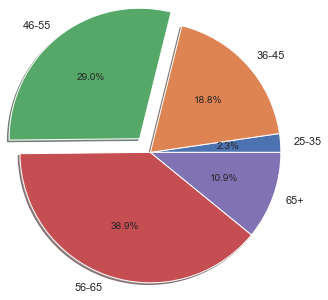

In [294]:
# Write your answer here (part3)
percentCount=heart.groupby('age_cat').size().reset_index(name='pCount')
#Count_Data.head()

%matplotlib inline
plt.pie(percentCount.pCount,labels=percentCount.age_cat,shadow=True,autopct='%1.1f%%',radius=1.5, explode=[0,0,0.2,0,0]);

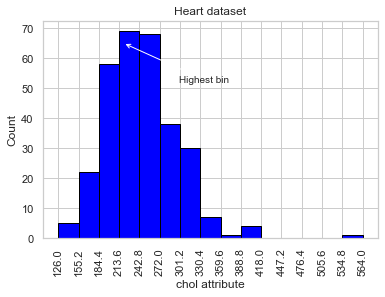

In [295]:
# Write your answer here (part4)
%matplotlib inline
fig, ax = plt.subplots()
count, bin_edges = np.histogram(heart.chol, bins=15)

heart.chol.plot(kind='hist', xticks=bin_edges, bins=15, color='blue', edgecolor='black')
plt.title("Heart dataset")
plt.xlabel("chol attribute")
plt.ylabel("Count")
ax.annotate("Highest bin",
            xy=(220, 65), xycoords='data',
            xytext=(300, 52), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            );
plt.xticks(rotation=90)
plt.show()

In [296]:
# Write your answer here (part5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()
X = heart.iloc[1:,1:12]
y = heart.iloc[1:,12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
model.fit(X_train, y_train)
print(model.fit(X_train, y_train))
y_test_hat = model.predict(X_test)

print(y_test_hat[1])
y_test

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


226    3
153    2
229    3
202    3
53     2
      ..
55     2
235    3
19     2
206    3
255    3
Name: thal, Length: 106, dtype: int64

In [297]:
# Write your answer here (part6)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

newData = heart.drop('age_cat', axis=1)
H = newData.drop('target', axis=1)
i = newData['target']
H_train, H_test, i_train, i_test = train_test_split(H, i, test_size=0.35, random_state=0)

naiveBayes = GaussianNB()
naiveBayes.fit(H_train, i_train) #train model
inSamplePred = naiveBayes.predict(H_train) #in-sample prediction
outSamplePred = naiveBayes.predict(H_test) #out-of-sample prediction

In [298]:
# Write your answer here (part7)
print('In sample')
inSampleNB = accuracy_score(i_train, inSamplePred, normalize=True) * 100
print('In sample accuracy : {}'.format(inSampleNB))
print()
print('Out of sample')
outSampleNB = accuracy_score(i_test, outSamplePred, normalize=True) * 100
print('Out of sample accuracy : {}'.format(outSampleNB))

In sample
In sample accuracy : 84.6938775510204

Out of sample
Out of sample accuracy : 79.43925233644859


# Write your answer here (part7)
The general expectation is that the in sample prediction accuracy should be greater than the out of sample prediction accuracy, because we use the in sample data for training the model. 
In my case the in sample accuracy is greater than the out of sample prediction accuracy

Confusion Matrix for Logistic Regression
[[ 0  1  4]
 [ 0 54  7]
 [ 0 15 25]]


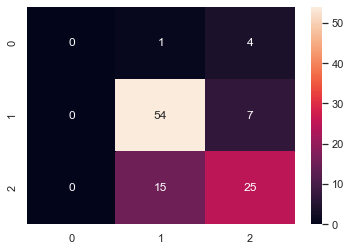

In [299]:
# Write your answer here (part8) "a"
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
print('Confusion Matrix for Logistic Regression')
print(confusion_matrix(y_test, y_test_hat))
sns.heatmap(confusion_matrix(y_test, y_test_hat), annot=True)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()


Confusion Matrix for Naive Bayes
[[38 15]
 [ 7 47]]



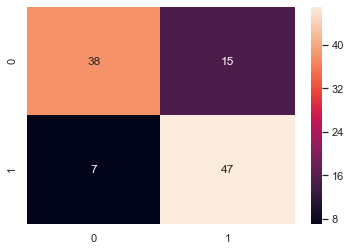

In [300]:
# Write your answer here (part8) "b"
print()
print('Confusion Matrix for Naive Bayes')
print(confusion_matrix(i_test, outSamplePred))
print()
sns.heatmap(confusion_matrix(i_test, outSamplePred), annot=True)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

<p><b>Question #4</b>:
<ol>
    <li>Download the Employee_Retention.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Convert <b>Sales</b> and <b>Salary</b> categorical features into dummy variables.
        <ul>
            <li>If it is necassary, delete the original Sales and Salary columns after the generation dummy variables. </li>
        </ul>
    </li>
    <li>Use mean normalization ($\frac{X-\mu}{\sigma}$) to normalize values in <b>number_project</b>, <b>average_montly_hours</b>, and <b>time_spend_company</b> columns.</li>
    <li>Use KNN to create three predictive models (1. with 3 neighbors, 2. with 4 neighbors, 3. with 7 neighbors)
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style='color:red'>stratify</b> attribute in your split.</li> 
        <li>Use all the features (including dummy variables) to create you predictive model.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Find the accuracy of your models using out-of-sample data (test data). Which model has the highest accuracy? </li>
    <li>Use KNN with 5 neighbors to create a new predictive model.
    <ul>
        <li>Use whole dataset for training.</li>
        <li>Use <b>satisfaction_level</b> and <b>last_evaluation</b> features as your independent variables.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Visualize the decision boundary of your model.</li>
</ol>

</p> 

In [301]:
# Write your answer here (part1)
import pandas as pd
import numpy as np
empData=pd.read_csv('Employee_Retention.csv')
empData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [302]:
# Write your answer here (part2)
empData = pd.get_dummies(empData, columns=["sales", "salary"])
empData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [303]:
# Write your answer here (part3)
numProjNormalized = (empData.number_project-empData.number_project.mean())/empData.number_project.std()
empData['number_project'] = numProjNormalized

avgMonHoursNormalized = (empData.average_montly_hours-empData.average_montly_hours.mean())/empData.average_montly_hours.std()
empData['average_montly_hours'] = avgMonHoursNormalized

timeSpendCompanyNormalized = (empData.time_spend_company-empData.time_spend_company.mean())/empData.time_spend_company.std()
empData['time_spend_company'] = timeSpendCompanyNormalized

empData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,-1.462814,-0.882010,-0.341224,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0.971081,1.220382,1.713379,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,2.593677,1.420610,0.343644,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0.971081,0.439493,1.028511,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,-1.462814,-0.841965,-0.341224,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [304]:
# Write your answer here (part4)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

y = empData['left']
X = empData.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

model1 = KNeighborsClassifier(n_neighbors=3)
print(model1)
model2 = KNeighborsClassifier(n_neighbors=4)
print(model2)
model3 = KNeighborsClassifier(n_neighbors=7)
print(model3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [305]:
# Write your answer here (part5)
from sklearn.metrics import accuracy_score

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

m1OutSample = model1.predict(X_test)
m2OutSample = model2.predict(X_test)
m3OutSample = model3.predict(X_test)

#accuracy_score(y_test_7, y_test_hat, normalize = True) * 100 #out-of-sample accuracy

print('Accuracy for Model 1 : {}'.format(accuracy_score(y_test, m1OutSample, normalize=True) * 100))
print()

print('Accuracy for Model 2 : {}'.format(accuracy_score(y_test, m2OutSample, normalize=True) * 100))
print()

print('Accuracy for Model 3: {}'.format(accuracy_score(y_test, m3OutSample, normalize=True) * 100))

Accuracy for Model 1 : 94.57777777777778

Accuracy for Model 2 : 94.37777777777778

Accuracy for Model 3: 94.22222222222221


# Write your answer here (part5)

Model 1 has the highest accuracy among the 3 models

In [306]:
# Write your answer here (part6)
XNew = empData[['satisfaction_level', 'last_evaluation']]

YNew = empData['left']

X_train, X_test, y_train, y_test = train_test_split(XNew, YNew, test_size=0.3, random_state=0)

newModel = KNeighborsClassifier(n_neighbors=5)
newModel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

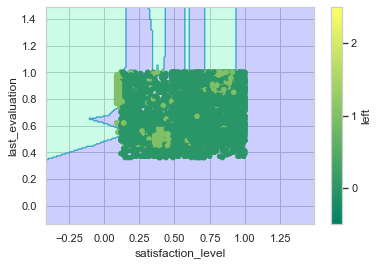

In [307]:
# Write your answer here (part7)
x_min, x_max = X_train.iloc[:, 0].min() - .5, X_train.iloc[:, 0].max() + .5
y_min, y_max = X_train.iloc[:, 1].min() - .5, X_train.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = newModel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='winter')

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s=20 ,cmap='summer')
plt.colorbar(ticks=range(3), label='left')
plt.clim(-0.5, 2.5)

plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation');

<p><b>Question #5</b>:</p>

<ol>
    <li>Download the Cars.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Convert categorical variables to dummy variables.</li>
    <li>Create scatter plots to show the relationship between variables.
    <ul>
        <li>Put appropriate title, axis labels and legend for your visualization.</li>
    </ul>
    </li>
    <li>Run explonatory linear regression using <u>statsmodels</u> package.
    <ul>
        <li><b>MSRP</b> (Manufacturer Suggested Retail Price) is your target variable.</li>
    </ul>
    </li>
    <li>Which factors are significant at <b>.05</b> level in your model?</li>
    <li>What is the $R^2$ for your model? What does $R^2$ mean in this analysis?</li>
    <li>Use linear regression to creat a predictive model.
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use all features to create you predictive model.</li>
        <li><b>MSRP</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li> Compute $R^2$ for both in-sample(train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li> 
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li>
</ol>

</p>

In [308]:
# Write your answer here (part1)
carsData = pd.read_csv('cars.csv')
carsData = carsData[['Year', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']]
carsData.head()

,Year,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,MANUAL,rear wheel drive,2.0,26,19,3916,46135
1,2011,MANUAL,rear wheel drive,2.0,28,19,3916,40650
2,2011,MANUAL,rear wheel drive,2.0,28,20,3916,36350
3,2011,MANUAL,rear wheel drive,2.0,28,18,3916,29450
4,2011,MANUAL,rear wheel drive,2.0,28,18,3916,34500


In [309]:
# Write your answer here (part2)
carsDataDummy = pd.get_dummies(carsData, columns=["Transmission Type", "Driven_Wheels", "Number of Doors"])
carsDataDummy.head()

,Year,highway MPG,city mpg,Popularity,MSRP,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2.0,Number of Doors_3.0,Number of Doors_4.0
0,2011,26,19,3916,46135,0,0,0,1,0,0,0,0,1,1,0,0
1,2011,28,19,3916,40650,0,0,0,1,0,0,0,0,1,1,0,0
2,2011,28,20,3916,36350,0,0,0,1,0,0,0,0,1,1,0,0
3,2011,28,18,3916,29450,0,0,0,1,0,0,0,0,1,1,0,0
4,2011,28,18,3916,34500,0,0,0,1,0,0,0,0,1,1,0,0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


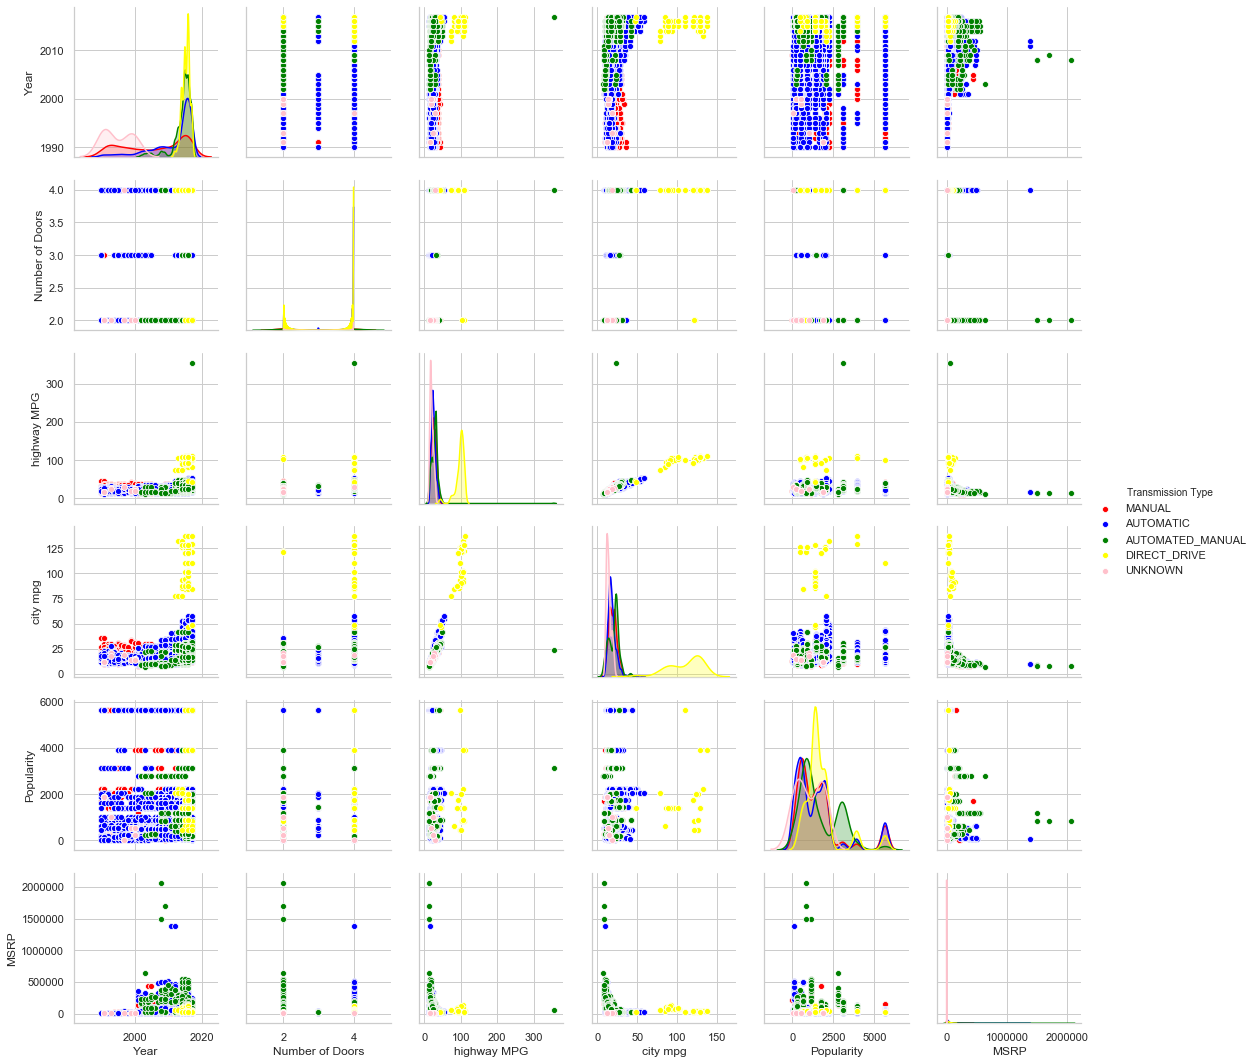

In [310]:
# Write your answer here (part3)
import seaborn as sns
attributes = ['Year', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
sns.pairplot(carsData[attributes], hue='Transmission Type', palette={'MANUAL':'red', 'AUTOMATED_MANUAL':'green', 'AUTOMATIC':'blue', 'DIRECT_DRIVE':'yellow', 'UNKNOWN':'pink'});

In [311]:
# Write your answer here (part4)
import numpy as np
import statsmodels.api as sm

y = carsDataDummy['MSRP']
X = carsDataDummy.drop('MSRP', axis=1)

p = sm.add_constant(X)
est = sm.OLS(y, p)
est2 = est.fit()

est2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     292.3
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:53:47   Log-Likelihood:            -1.4624e+05
No. Observations:               11914   AIC:                         2.925e+05
Df Residuals:                   11899   BIC:                         2.926e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -3.188e+06   1.04e+05    -30.725      0.000   -3.39e+06   -2.98e+06
Year                                2402.1902     74.814     32.109      0.000    2255.543    2548.837
highway MPG                        -1156.6108    129.356     -8.941      0.000   -1410.169    -903.052
city mpg                           -2250.3644    149.443    -15.058      0.000   -2543.296   -1957.432
Popularity                            -3.1542      0.338     -9.336      0.000      -3.816      -2.492
Transmission Type_AUTOMATED_MANUAL -6.463e+05   2.19e+04    -29.528      0.000   -6.89e+05   -6.03e+05
Transmission Type_AUTOMATIC        -6.971e+05   2.17e+04    -32.159      0.000    -7.4e+05   -6.55e+05
Transmission Type_DIRECT_DRIVE     -4.101e+05   2.13e+04    -19.292      0.000   -4.52e+05   -3.68e+05
Transmission Type_MANUAL           -7.025e+05   2.13e+04    -32.984      0.000   -7.44e+05   -6.61e+05
Transmission Type_UNKNOWN          -7.322e+05   2.29e+04    -32.015      0.000   -7.77e+05   -6.87e+05
Driven_Wheels_all wheel drive      -7.875e+05   2.61e+04    -30.211      0.000   -8.39e+05   -7.36e+05
Driven_Wheels_four wheel drive     -8.111e+05    2.6e+04    -31.174      0.000   -8.62e+05    -7.6e+05
Driven_Wheels_front wheel drive    -7.993e+05   2.58e+04    -31.029      0.000    -8.5e+05   -7.49e+05
Driven_Wheels_rear wheel drive     -7.902e+05    2.6e+04    -30.401      0.000   -8.41e+05   -7.39e+05
Number of Doors_2.0                -1.425e+04    2.2e+04     -0.648      0.517   -5.74e+04    2.89e+04
Number of Doors_3.0                 -5.76e+04   2.22e+04     -2.597      0.009   -1.01e+05   -1.41e+04
Number of Doors_4.0                -3.551e+04    2.2e+04     -1.615      0.106   -7.86e+04    7597.189
==============================================================================
Omnibus:                    22391.281   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         70882273.283
Skew:                          14.078   Prob(JB):                         0.00
Kurtosis:                     379.822   Cond. No.                     9.26e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Write your answer here (part5)

From the above OLS summary we can see that the P values for Number of Doors_2.0 and Number of Doors_4.0 is greater than 0.05, hence they are insignificant. All the other factors are significant at 0.05 level

# Write your answer here (part6)

The R-squared value obtained is 0.256

R-squared is defined as Explianed Variation/ Total Variation
The R-squared value is always between 0 and 1, meaning 0% to 100&

If the value is closer to 0 then it means the model does not explain the variability of the response data around its mean
If the value is closer to 1 then it means the model explains all the variability of the response data around its mean

In [312]:
# Write your answer here (part7)
from sklearn.linear_model import LinearRegression
newCarsData = pd.read_csv('cars.csv')
newCarsData = newCarsData[['Year', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']]
X = newCarsData.drop('MSRP', axis=1)
y = newCarsData['MSRP']
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lModel = LinearRegression()

lModel.fit(X_train, y_train)

inSamplePrediction = lModel.predict(X_train)
outOfSamplePrediction = lModel.predict(X_test)

In [313]:
# Write your answer here (part8)
from sklearn.metrics import r2_score

print('In sample R-squared score : {}'.format(r2_score(y_train, inSamplePrediction)))
print()
print('Out of sample R-squared score : {}'.format(r2_score(y_test, outOfSamplePrediction)))

In sample R-squared score : 0.13485477826082204

Out of sample R-squared score : 0.1892527843132289


# Write your answer here (part8)

Here the out of sample R-squared is slightly higher than the in sample R-squared. My expectation was a higher R-squared value for in sample. This means that the variance observed can not be clearly explained by the the model's inputs

In [314]:
# Write your answer here (part9)
from sklearn.metrics import mean_squared_error 
#np.square(np.subtract(Y_true,Y_pred)).mean()
insMSE = mean_squared_error(y_train, inSamplePrediction)
outMSE = mean_squared_error(y_test, outOfSamplePrediction)
print('In sample MSE : {}'.format(insMSE))
print('Out of sample MSE : {}'.format(outMSE))

In sample MSE : 3650440948.3825154
Out of sample MSE : 1781266618.7499032


# Write your answer here (part8)

Expected MSE for in sample was to be less than the out sample MSE. In my case as well the out of sample MSE is lesser than the in sample MSE

<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Upload the file into the Canvas (Assignment #2)</li>
        <li>All the assignments should be submitted by <b>Monday March 16 at 7:00 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
        </p> 